# Chapter 2 - Statistical Learning

In [1]:
# Libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## This exercise relates to the College data set

Which can be found in the file College.csv on the book website. It contains a number of variables for 777 different universities and colleges in the US. 

The variables are:

    • Private : Public/private indicator
    • Apps : Number of applications received
    • Accept : Number of applicants accepted
    • Enroll : Number of new students enrolled
    • Top10perc : New students from top 10 % of high school class
    • Top25perc : New students from top 25 % of high school class
    • F.Undergrad : Number of full-time undergraduates
    • P.Undergrad : Number of part-time undergraduates
    • Outstate : Out-of-state tuition
    • Room.Board : Room and board costs
    • Books : Estimated book costs
    • Personal : Estimated personal spending
    • PhD : Percent of faculty with Ph.D.s
    • Terminal : Percent of faculty with terminal degree
    • S.F.Ratio : Student/faculty ratio
    • perc.alumni : Percent of alumni who donate
    • Expend : Instructional expenditure per student
    • Grad.Rate : Graduation rate

**Use the pd.read_csv() function to read the data into Python. Call the loaded data college. Make sure that you have the directory set to the correct location for the data.**

In [2]:
# Read data
file = 'data/College.csv'

college = pd.read_csv(file)

college.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [3]:
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

Look at the data used in the notebook by creating and running a new cell with just the code college in it. You should notice
that the first column is just the name of each university in a column named something like Unnamed: 0. We don’t really want
pandas to treat this as data. However, it may be handy to have these names for later. Try the following commands and similarly
look at the resulting data frames:

    college2 = pd.read_csv('College.csv', index_col=0)
    college3 = college.rename({'Unnamed: 0': 'College'},axis=1)
    college3 = college3.set_index('College')
    
This has used the first column in the file as an index for the data frame. This means that pandas has given each row a name corresponding to the appropriate university. Now you should see that the first data column is Private. Note that the names of the colleges appear on the left of the table. We also introduced a new python object above: a dictionary, which is specified by (key, value) pairs. Keep your modified version of the data with the following:

    college = college3

In [4]:
#set the index as  the first col

college3 = college.set_index(['Unnamed: 0'], append=True, verify_integrity=True)
college3.rename_axis([None, 'Name'], inplace=True)
college3.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 777 entries, (0, 'Abilene Christian University') to (776, 'York College of Pennsylvania')
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-nul

In [5]:
college = college3

**Use the describe() method of to produce a numerical summary of the variables in the data set.**

In [6]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


**Use the `pd.plotting.scatter_matrix()` function to produce a scatterplot matrix of the first columns [Top10perc, Apps, Enroll]. Recall that you can reference a list C of columns of a data frame A using A[C].**

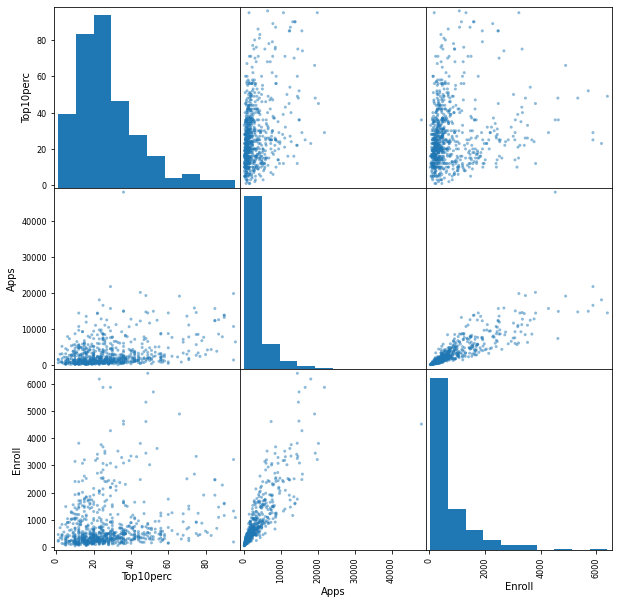

In [7]:
columns = ["Top10perc", "Apps", "Enroll"]

scatter_matrix = pd.plotting.scatter_matrix(college[columns], figsize=(10, 10))

plt.show()

**Use the boxplot() method of college to produce side-by-side boxplots of Outstate versus Private.**

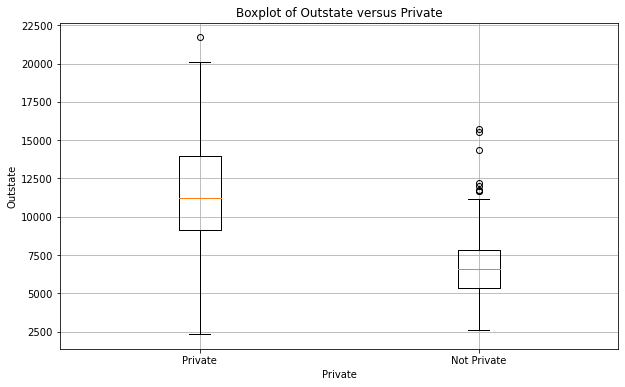

In [8]:
# Filter the college for Elite == 'Yes' and 'No'
private_yes = college[college['Private'] == 'Yes']['Outstate']
private_no = college[college['Private'] == 'No']['Outstate']

# Create a list containing the college to be plotted
college_to_plot = [private_yes, private_no]

# Create a boxplot
plt.figure(figsize=(10, 6))  # Optional: Adjust figure size
plt.boxplot(college_to_plot, labels=['Private', 'Not Private'])
plt.xlabel('Private')
plt.ylabel('Outstate')
plt.title('Boxplot of Outstate versus Private')
plt.grid(True)
plt.show()

<AxesSubplot:xlabel='Private', ylabel='Outstate'>

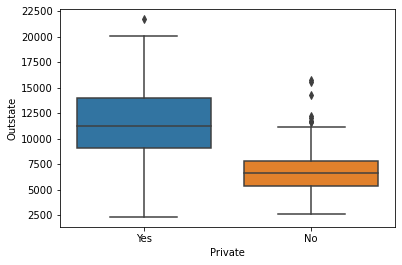

In [9]:
sns.boxplot(x = college['Private'],y = college['Outstate'])

Create a new qualitative variable, called Elite, by binning the Top10perc variable into two groups based on whether or not the
proportion of students coming from the top 10% of their high school classes exceeds 50%.

    college['Elite'] = pd.cut(college['Top10perc'], [0,0.5,1], labels=['No', 'Yes'])

Use the value_counts() method of college['Elite'] to see how many elite universities there are. Finally, use the boxplot() method again to produce side-by-side boxplots of Outstate versus Elite.

In [10]:
college['Elite']=pd.cut(college['Top10perc'], [0,50,100], labels=['No', 'Yes'])

# college['Elite'] = np.where(college['Top10perc'] > 50,'Yes','No')

# how many elite universities there are
college['Elite'].value_counts()

No     699
Yes     78
Name: Elite, dtype: int64

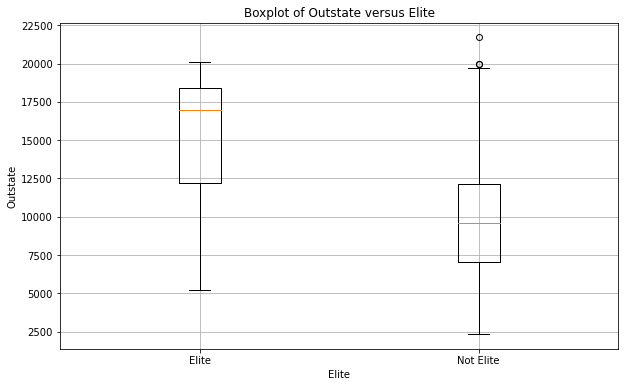

In [11]:
# Filter the college for Elite == 'Yes' and 'No'
elite_yes = college[college['Elite'] == 'Yes']['Outstate']
elite_no = college[college['Elite'] == 'No']['Outstate']

# Create a list containing the college to be plotted
college_to_plot = [elite_yes, elite_no]

# Create a boxplot
plt.figure(figsize=(10, 6))  # Optional: Adjust figure size
plt.boxplot(college_to_plot, labels=['Elite', 'Not Elite'])
plt.xlabel('Elite')
plt.ylabel('Outstate')
plt.title('Boxplot of Outstate versus Elite')
plt.grid(True)
plt.show()

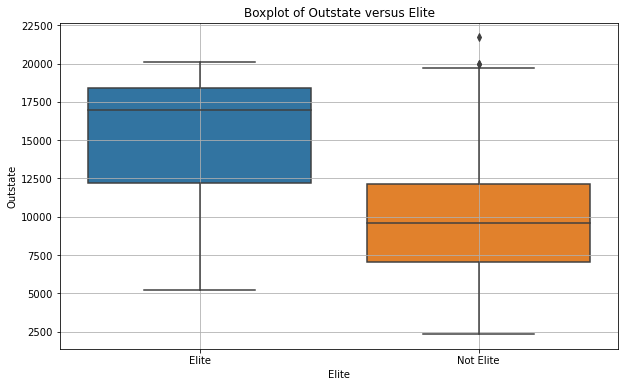

In [12]:
# Filter the college for Elite == 'Yes' and 'No'
private_yes = college[college['Elite'] == 'Yes']['Outstate']
private_no = college[college['Elite'] == 'No']['Outstate']

# Concatenate the filtered data into a single DataFrame
college_df = pd.concat([private_yes, private_no], axis=1)
college_df.columns = ['Elite', 'Not Elite']

# Create a boxplot using seaborn
plt.figure(figsize=(10, 6))  # Optional: Adjust figure size
sns.boxplot(data=college_df)
plt.xlabel('Elite')
plt.ylabel('Outstate')
plt.title('Boxplot of Outstate versus Elite')
plt.grid(True)
plt.show()

**Use the plot.hist() method of college to produce some histograms with differing numbers of bins for a few of the quantitative variables. The command `plt.subplots(2, 2)` may be useful: it will divide the plot window into four regions so that four plots can be made simultaneously. By changing the arguments you can divide the screen up in other combinations.**

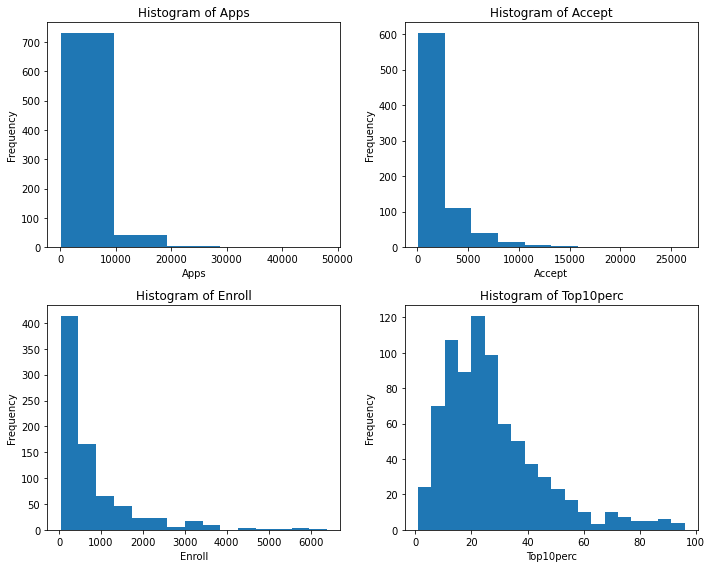

In [13]:
# Select a few quantitative variables for the histograms
quantitative_vars = ['Apps', 'Accept', 'Enroll', 'Top10perc']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Flatten axes for easy iteration
axes = axes.flatten()

# Iterate over selected variables and plot histograms
for i, var in enumerate(quantitative_vars):
    college[var].plot.hist(ax=axes[i], bins=i*5 + 5)  # Adjust number of bins
    axes[i].set_title(f'Histogram of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

**Continue exploring the data, and provide a brief summary of what you discover.**

In [14]:
# we need to plot by first dividing some of the features into bins  andt then plotting the same
# the features used are ['Enroll','Phd','Termainal']

college['Enroll'] = pd.cut(college['Enroll'],bins=3,labels = ['Low','Medium','High'])

college['PhD'] = pd.cut(college['PhD'],bins = 5,labels = ['Very low','Low','Medium','High','Very High'])

college['Terminal'] = pd.cut(college['Terminal'],bins = 4,labels = ['Very low','Low','High','Very High'])

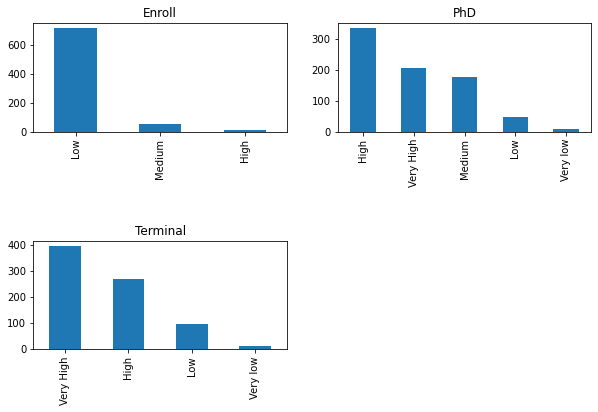

In [15]:
fig = plt.figure(figsize=(10, 6))

plt.subplot(2,2,1)
college['Enroll'].value_counts().plot.bar(title = 'Enroll')

plt.subplot(2,2,2)
college['PhD'].value_counts().plot.bar(title = 'PhD')

plt.subplot(2,2,3)
college['Terminal'].value_counts().plot.bar(title = 'Terminal')

#to add space in between the subplots
fig.subplots_adjust(hspace=1)

## This exercise involves the Auto data set studied in the lab. 

Make sure that the missing values have been removed from the data.

    Which of the predictors are quantitative, and which are qualitative?

In [16]:
# Read data
file = 'data/Auto.csv'

auto = pd.read_csv(file)

auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [17]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


**What is the range of each quantitative predictor? You can answer this using the min() and max() methods in numpy.**

In [18]:
auto.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [19]:
range_mpg = auto['mpg'].max() - auto['mpg'].min()
range_cylinders = auto['cylinders'].max() - auto['cylinders'].min()
range_displacement = auto['displacement'].max() - auto['displacement'].min()
range_weight = auto['weight'].max() - auto['weight'].min()
range_acceleration = auto['acceleration'].max() - auto['acceleration'].min()
range_year = auto['year'].max() - auto['year'].min()
range_origin = auto['origin'].max() - auto['origin'].min()

# Alternative: range_mpg = np.max(auto['mpg']) - np.min(auto['mpg'])

print("Mpg Range:",range_mpg)
print("Cylinders Range:",range_cylinders)
print("Displacement Range:",range_displacement)
print("Weight Range:",range_weight)
print("Acceleration Range:",range_acceleration)
print("Year Range:",range_year)
print("Origin Range:",range_origin)

Mpg Range: 37.6
Cylinders Range: 5
Displacement Range: 387.0
Weight Range: 3527
Acceleration Range: 16.8
Year Range: 12
Origin Range: 2


**What is the mean and standard deviation of each quantitative predictor?**

In [20]:
mpg_mean = auto['mpg'].mean()
mpg_std = auto['mpg'].std()
cylinders_mean = auto['cylinders'].mean()
cylinders_std = auto['cylinders'].std()
displacement_mean = auto['displacement'].mean()
displacement_std = auto['displacement'].std()
weight_mean = auto['weight'].mean()
weight_std = auto['weight'].std()
acceleration_mean = auto['acceleration'].mean()
acceleration_std = auto['acceleration'].std()
year_mean = auto['year'].mean()
year_std = auto['year'].std()
origin_mean = auto['origin'].mean()
origin_std = auto['origin'].std()


print("Mpg mean/std:",round(mpg_mean,2),round(mpg_std,2))
print("Cylinders mean/std:",round(cylinders_mean,2),round(cylinders_std,2))
print("Displacement mean/std:",round(displacement_mean,2),round(displacement_std,2))
print("Weight mean/std:",round(weight_mean,2),round(weight_std,2))
print("Acceleration mean/std:",round(acceleration_mean,2),round(acceleration_std,2))
print("Year mean/std:",round(year_mean,2),round(year_std,2))
print("Origin mean/std:",round(origin_mean,2),round(origin_std,2))

Mpg mean/std: 23.52 7.83
Cylinders mean/std: 5.46 1.7
Displacement mean/std: 193.53 104.38
Weight mean/std: 2970.26 847.9
Acceleration mean/std: 15.56 2.75
Year mean/std: 75.99 3.69
Origin mean/std: 1.57 0.8


**Now remove the 10th through 85th observations. What is the range, mean, and standard deviation of each predictor in the subset of the data that remains?**

In [21]:
auto_without_10_to_85 = auto.drop(auto.index[9:84])

auto_without_10_to_85.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           322 non-null    float64
 1   cylinders     322 non-null    int64  
 2   displacement  322 non-null    float64
 3   horsepower    322 non-null    object 
 4   weight        322 non-null    int64  
 5   acceleration  322 non-null    float64
 6   year          322 non-null    int64  
 7   origin        322 non-null    int64  
 8   name          322 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 25.2+ KB


In [22]:
auto.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [23]:
auto_without_10_to_85.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000
mean,24.446584,5.366460,186.770186,2931.372671,15.725466,77.136646,1.602484
std,7.897147,1.652674,99.606562,810.712477,2.676686,3.119623,0.818627
min,11.000000,3.000000,68.000000,1649.000000,8.500000,70.000000,1.000000
25%,18.000000,4.000000,98.500000,2211.250000,14.000000,75.000000,1.000000
50%,23.950000,4.000000,144.500000,2792.500000,15.550000,77.000000,1.000000
75%,30.650000,6.000000,250.000000,3494.250000,17.275000,80.000000,2.000000
max,46.600000,8.000000,455.000000,4997.000000,24.800000,82.000000,3.000000


In [24]:
info = auto_without_10_to_85.describe().T
info['range'] = info['max'] - info['min']
info = info[['mean','range','std']]
info.T

,mpg,cylinders,displacement,weight,acceleration,year,origin
mean,24.446584,5.366460,186.770186,2931.372671,15.725466,77.136646,1.602484
range,35.600000,5.000000,387.000000,3348.000000,16.300000,12.000000,2.000000
std,7.897147,1.652674,99.606562,810.712477,2.676686,3.119623,0.818627


**Using the full data set, investigate the predictors graphically, using scatterplots or other tools of your choice. Create some plots highlighting the relationships among the predictors. Comment on your findings.**

array([[<AxesSubplot:xlabel='mpg', ylabel='mpg'>,
        <AxesSubplot:xlabel='weight', ylabel='mpg'>,
        <AxesSubplot:xlabel='displacement', ylabel='mpg'>,
        <AxesSubplot:xlabel='acceleration', ylabel='mpg'>],
       [<AxesSubplot:xlabel='mpg', ylabel='weight'>,
        <AxesSubplot:xlabel='weight', ylabel='weight'>,
        <AxesSubplot:xlabel='displacement', ylabel='weight'>,
        <AxesSubplot:xlabel='acceleration', ylabel='weight'>],
       [<AxesSubplot:xlabel='mpg', ylabel='displacement'>,
        <AxesSubplot:xlabel='weight', ylabel='displacement'>,
        <AxesSubplot:xlabel='displacement', ylabel='displacement'>,
        <AxesSubplot:xlabel='acceleration', ylabel='displacement'>],
       [<AxesSubplot:xlabel='mpg', ylabel='acceleration'>,
        <AxesSubplot:xlabel='weight', ylabel='acceleration'>,
        <AxesSubplot:xlabel='displacement', ylabel='acceleration'>,
        <AxesSubplot:xlabel='acceleration', ylabel='acceleration'>]],
      dtype=object)

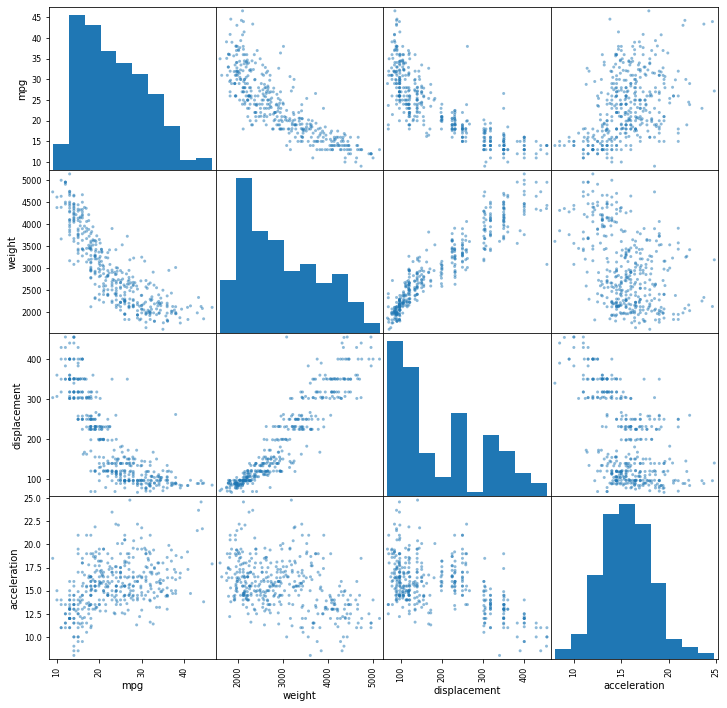

In [25]:
pd.plotting.scatter_matrix(auto[['mpg', 'weight', 'displacement', 'acceleration']], figsize=(12, 12))

**Suppose that we wish to predict gas mileage (mpg) on the basis of the other variables. Do your plots suggest that any of the
other variables might be useful in predicting mpg? Justify your answer**

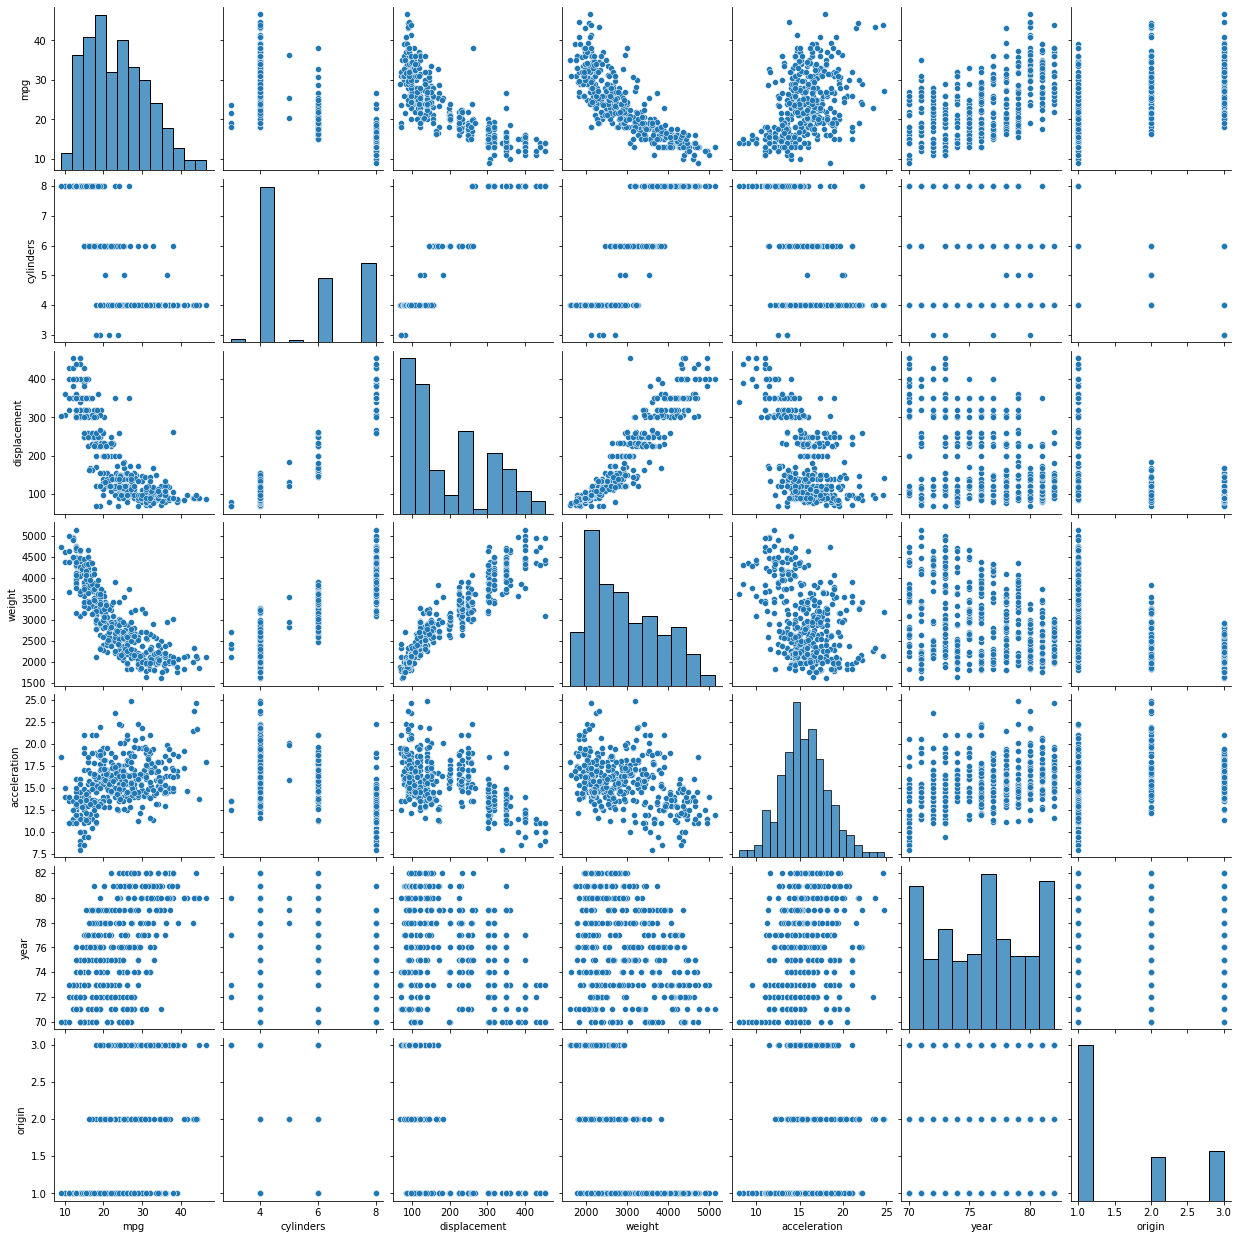

In [26]:
sns.pairplot(auto)

Mpg has a linear relation with variables weight and displacement, with a descending trend.

## This exercise involves the Boston housing data set.

    To begin, load in the Boston data set, which is part of the ISLP library.

In [27]:
# Read data
file = 'data/Boston.csv'

boston = pd.read_csv(file)

boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


**How many rows are in this data set? How many columns? What do the rows and columns represent?**

In [28]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


**Make some pairwise scatterplots of the predictors (columns) in this data set. Describe your findings**

array([[<AxesSubplot:xlabel='crim', ylabel='crim'>,
        <AxesSubplot:xlabel='rm', ylabel='crim'>,
        <AxesSubplot:xlabel='age', ylabel='crim'>,
        <AxesSubplot:xlabel='tax', ylabel='crim'>,
        <AxesSubplot:xlabel='rad', ylabel='crim'>],
       [<AxesSubplot:xlabel='crim', ylabel='rm'>,
        <AxesSubplot:xlabel='rm', ylabel='rm'>,
        <AxesSubplot:xlabel='age', ylabel='rm'>,
        <AxesSubplot:xlabel='tax', ylabel='rm'>,
        <AxesSubplot:xlabel='rad', ylabel='rm'>],
       [<AxesSubplot:xlabel='crim', ylabel='age'>,
        <AxesSubplot:xlabel='rm', ylabel='age'>,
        <AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='tax', ylabel='age'>,
        <AxesSubplot:xlabel='rad', ylabel='age'>],
       [<AxesSubplot:xlabel='crim', ylabel='tax'>,
        <AxesSubplot:xlabel='rm', ylabel='tax'>,
        <AxesSubplot:xlabel='age', ylabel='tax'>,
        <AxesSubplot:xlabel='tax', ylabel='tax'>,
        <AxesSubplot:xlabel='rad', ylabel='tax'

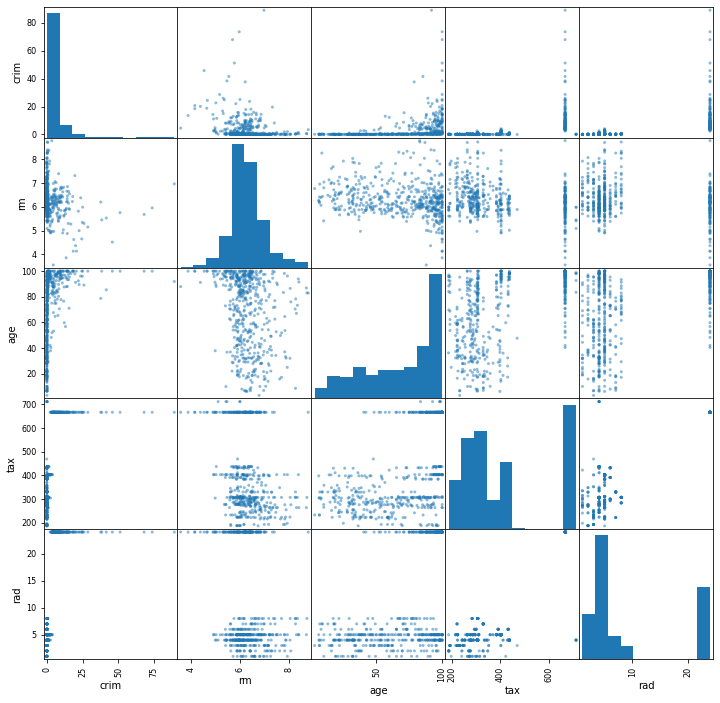

In [29]:
pd.plotting.scatter_matrix(boston[['crim','rm','age','tax','rad']], figsize=(12, 12))

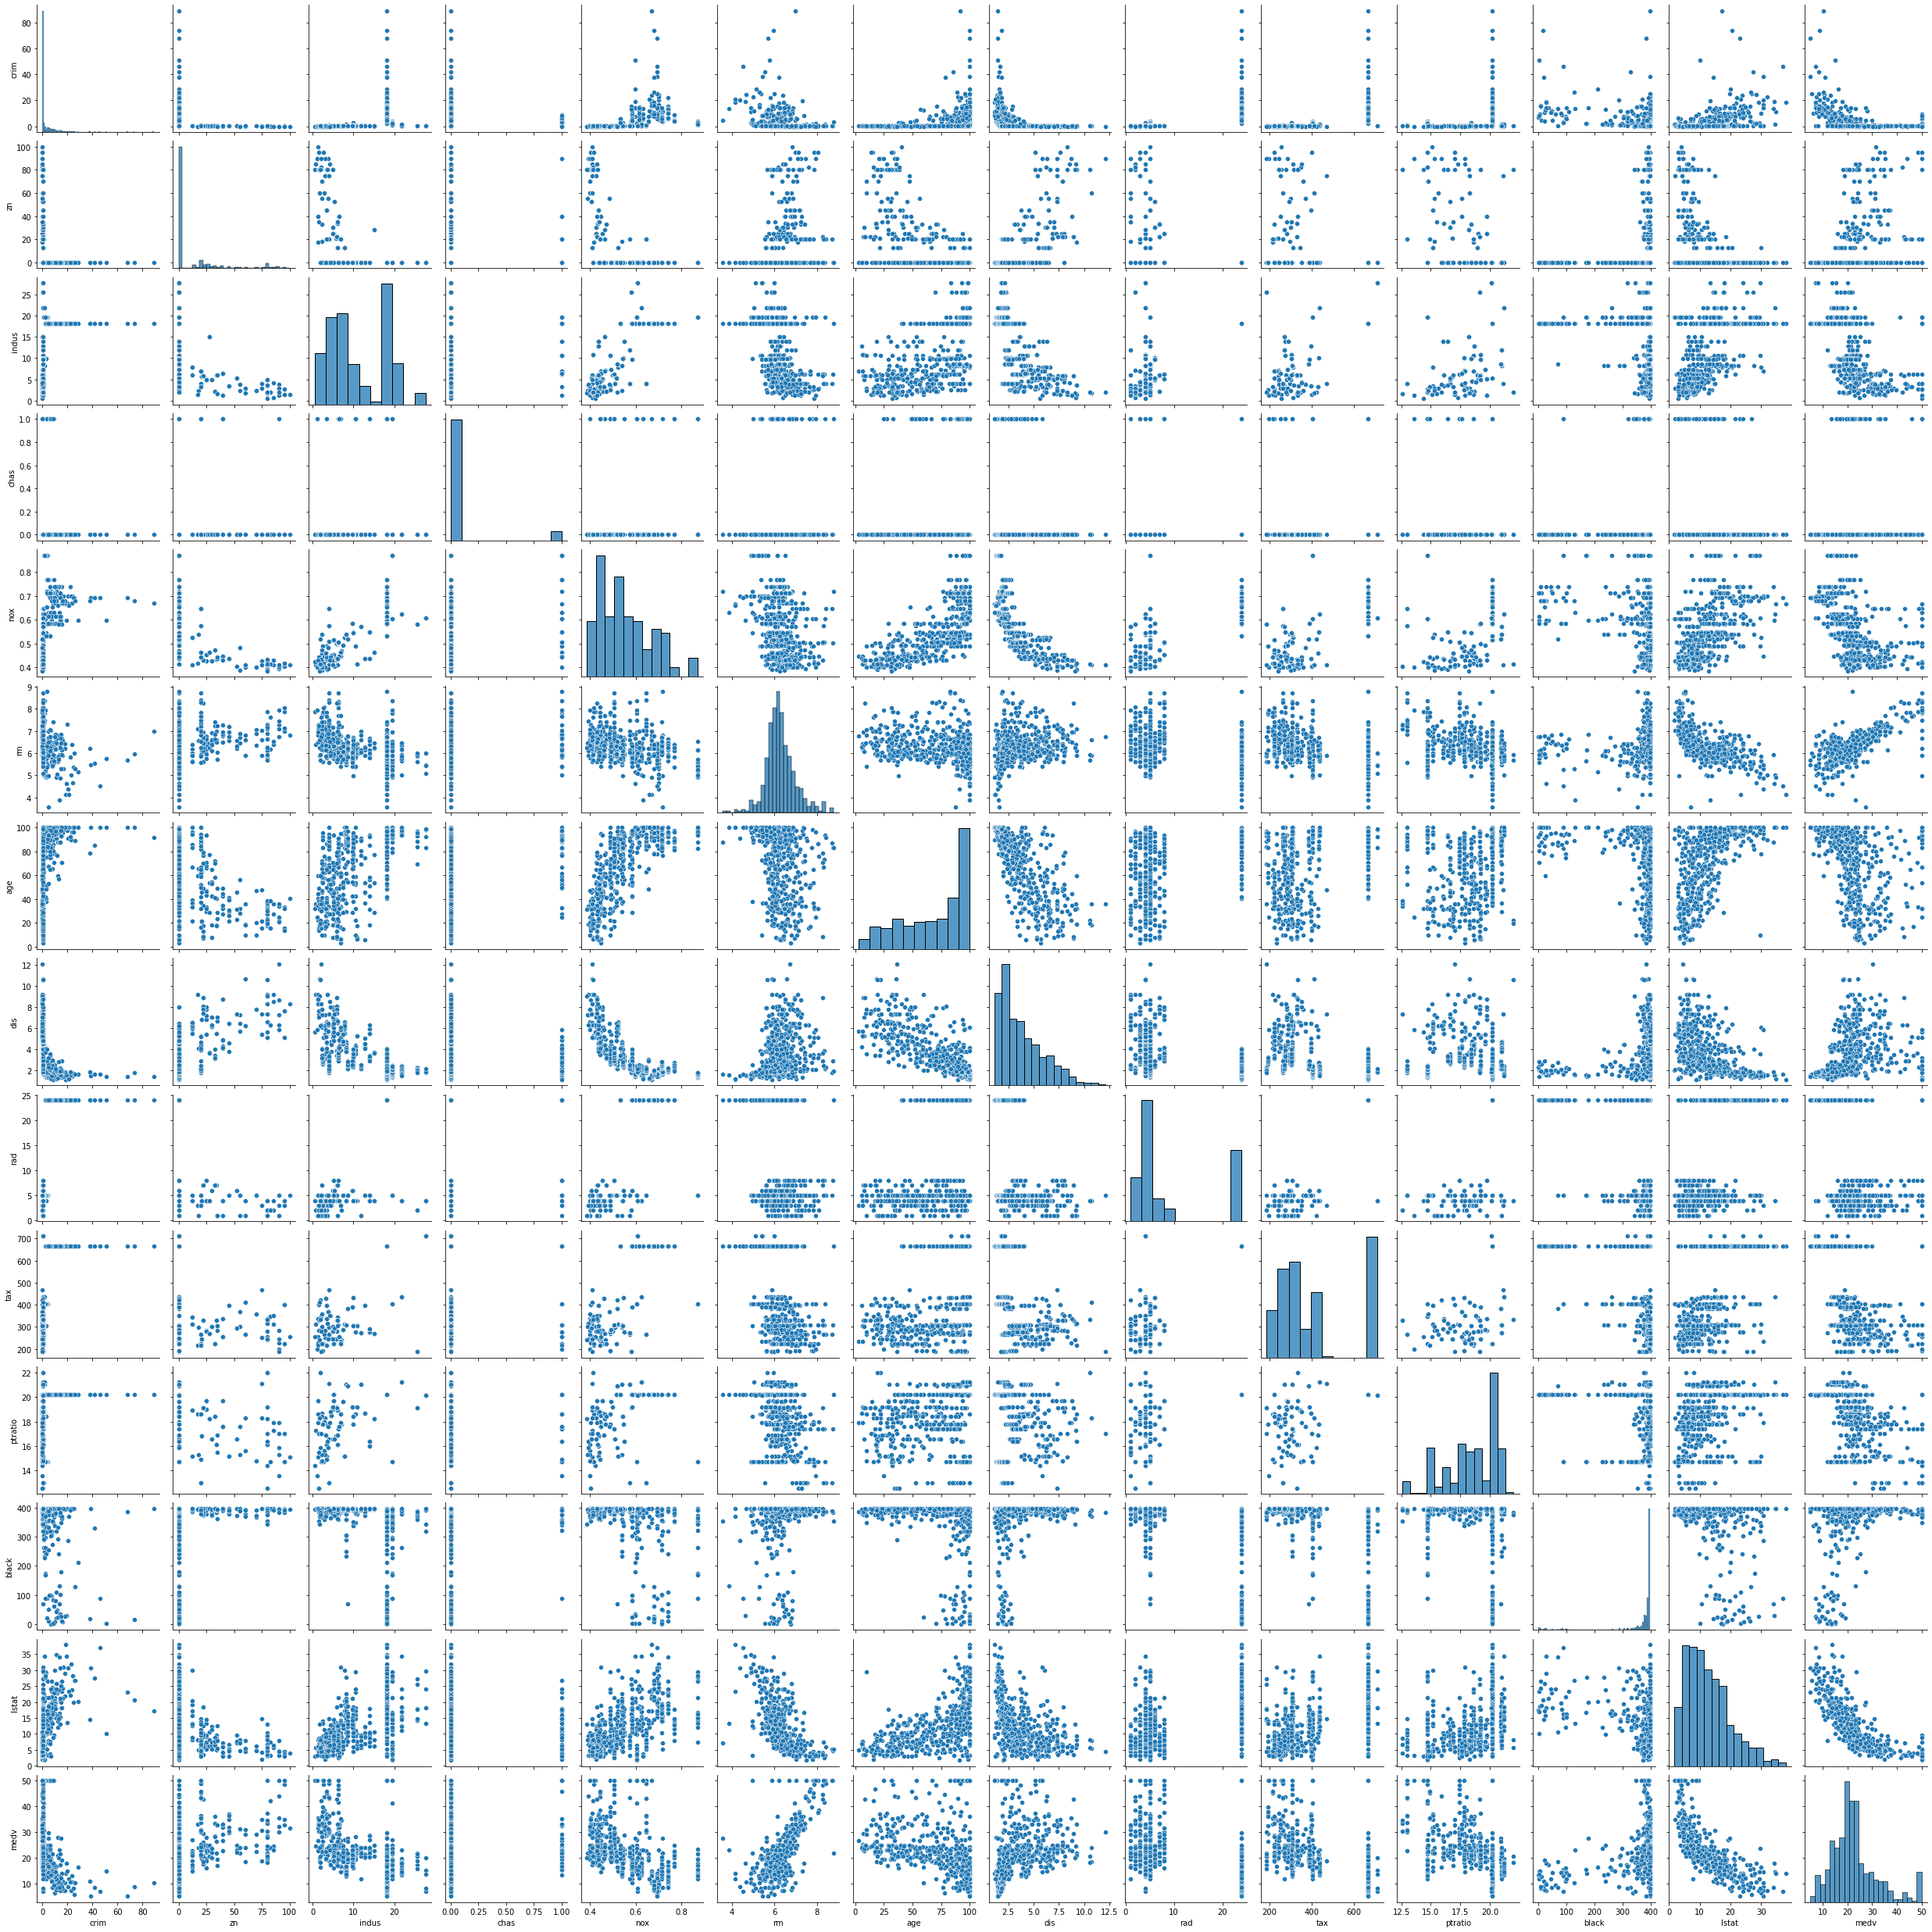

In [30]:
sns.pairplot(boston)

**Are any of the predictors associated with per capita crime rate? If so, explain the relationship.**

In [31]:
# Calculate the correlation matrix
corr_matrix = boston.corr()

corr_matrix.iloc[1:,0].sort_values()

medv      -0.388305
black     -0.385064
dis       -0.379670
rm        -0.219247
zn        -0.200469
chas      -0.055892
ptratio    0.289946
age        0.352734
indus      0.406583
nox        0.420972
lstat      0.455621
tax        0.582764
rad        0.625505
Name: crim, dtype: float64

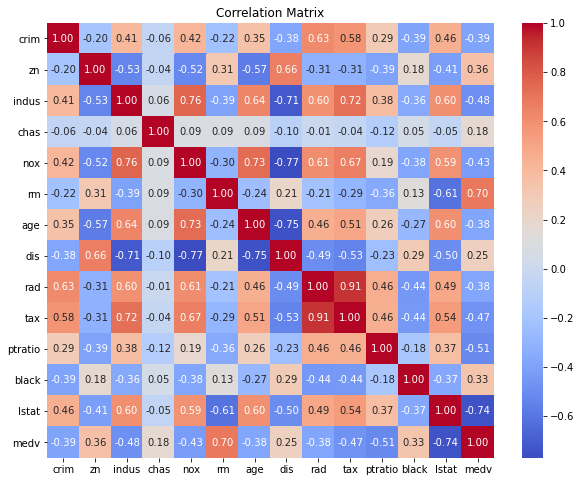

In [32]:
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

TAX (0.63), RAD (0.58) are positively correlated.

**Do any of the suburbs of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios? Comment on the range of each predictor.**

In [33]:
boston.sort_values(by= ['crim','tax','ptratio'],ascending=False).head().index

Int64Index([380, 418, 405, 410, 414], dtype='int64')

**How many of the suburbs in this data set bound the Charles river?**

In [34]:
print(len(boston[boston['chas'] == 1]))
print(len(boston[boston['chas'] == 1]) / len(boston))

35
0.0691699604743083


Only 35 houses are river bounds. it comprises of 6.9% of the total dataset

**What is the median pupil-teacher ratio among the towns in this data set?**

In [35]:
boston['ptratio'].median()

19.05

**Which suburb of Boston has lowest median value of owner-occupied homes? What are the values of the other predictors for that suburb, and how do those values compare to the overall ranges for those predictors? Comment on your findings.**

In [36]:
boston[boston['medv'] == boston['medv'].min()].head(1)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
398,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,396.9,30.59,5.0


In [37]:
info = boston.describe().T
info = info[['mean','25%','50%','75%']]
info.T

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
mean,3.613524,11.363636,11.136779,0.06917,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
25%,0.082045,0.000000,5.190000,0.00000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.00000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.00000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000


We can see the id 398 has very high value of CRIM, which is more than ten times of the mean CRIM.

**In this data set, how many of the suburbs average more than seven rooms per dwelling? More than eight rooms per dwelling? Comment on the suburbs that average more than eight rooms per dwelling.**

In [38]:
len(boston[boston['rm']>7])

64

In [39]:
len(boston[boston['rm']>8])

13

In [40]:
info = boston[boston['rm']>8].describe().T
info = info[['mean','25%','50%','75%']]
info.T

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
mean,0.718795,13.615385,7.078462,0.153846,0.539238,8.348538,71.538462,3.430192,7.461538,325.076923,16.361538,385.210769,4.31,44.2
25%,0.331470,0.000000,3.970000,0.000000,0.504000,8.247000,70.400000,2.288500,5.000000,264.000000,14.700000,384.540000,3.32,41.7
50%,0.520140,0.000000,6.200000,0.000000,0.507000,8.297000,78.300000,2.894400,7.000000,307.000000,17.400000,386.860000,4.14,48.3
75%,0.578340,20.000000,6.200000,0.000000,0.605000,8.398000,86.500000,3.651900,8.000000,307.000000,17.400000,389.700000,5.12,50.0


In [41]:
info = boston.describe().T
info = info[['mean','25%','50%','75%']]
info.T

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
mean,3.613524,11.363636,11.136779,0.06917,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
25%,0.082045,0.000000,5.190000,0.00000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.00000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.00000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000


Suburbs having more than 8 rooms per dwelling have very less crime rater (CRIM) values. Also, these have less value of LSTAT, and theit target value, price is signifanctly larger than the overall mean price of the whole dataset